<a href="https://colab.research.google.com/github/rijhkllll/FIrstOne4/blob/master/hyper_param_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
uploaded = files.upload()

In [ ]:
#data=np.genfromtxt("fish_cost.csv",delimiter=",")
data=pd.read_csv("mego.csv",delimiter=",")
#data=np.asarray(data)
data=np.asarray(data, dtype=np.float64)
x=data[:,:-1]
x=np.asfarray(x,float)
y=data[:,-1]
y=np.asfarray(y,float)

print(x.shape)
#print(data)
#print(x)
#print(y)

(191, 5)


In [ ]:
x = x.reshape(x.shape[0], 5,-1)
print(x.shape)

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(5,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(xtrain, ytrain, batch_size=12,epochs=200, verbose=0)

ypred = model.predict(xtest)
#print(model.evaluate(xtrain, ytrain))
print("MSE: %.4f" % mean_squared_error(ytest, ypred))

(191, 5, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 4, 32)             96        
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,417
Trainable params: 8,417
Non-trainable params: 0
_________________________________________________________________
MSE: 28.6491


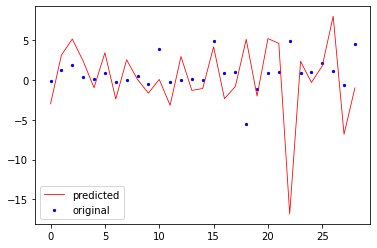

In [ ]:
x_ax = range(len(ypred))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()